In [1]:
import json
import numpy as np
import os

from lmfit import Model

import matplotlib.pyplot as plt
%matplotlib notebook

input_file = "data/debug_fit.json"
assert os.path.exists(input_file)

with open(input_file, 'r') as read_file:
    data = json.load(read_file)

x_axis_full = np.array(data['x_axis'])
y_axis_full = np.array(data['y_axis'])
assert len(x_axis_full) == len(y_axis_full)

last_index = 1000
x_axis = x_axis_full[0: last_index]
y_axis = y_axis_full[0: last_index]

<IPython.core.display.Javascript object>


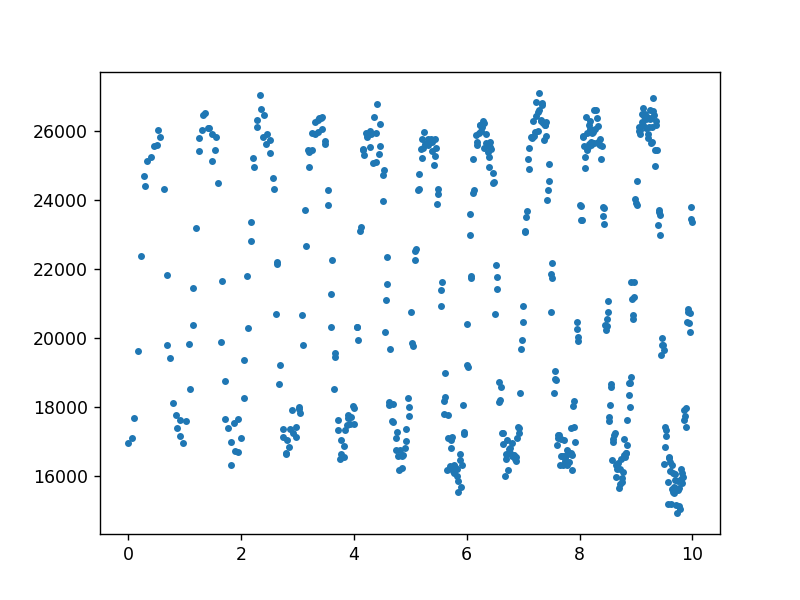

In [6]:
plt.figure(0)
plt.plot(x_axis, y_axis, '.')

# find maximas

In [ ]:
from scipy.signal import find_peaks

In [ ]:
peaks, _ = find_peaks(y_axis, distance=30)

In [ ]:
plt.figure(1)
plt.plot(x_axis, y_axis, '.')
plt.plot(x_axis[peaks], y_axis[peaks], 'xr')

# using my own algo 

In [ ]:
import copy

## Algo 1 

In [ ]:
# those thresholds will be used to make sure when a new data point is over both thresholds, 
# we are now switching to a new peak maxima

low_threshold = 20000
high_threshold = 22000

indexes_below_low_threshold = np.where(y_axis < low_threshold)
working_y_axis = copy.deepcopy(y_axis)
working_y_axis[indexes_below_low_threshold] = -1

# plt.figure(3)
# plt.plot(x_axis, working_y_axis, '.')

list_of_x_of_local_max = []
local_y_max = 0
x_of_local_max = 0
for _index, _y_value in enumerate(working_y_axis):

    print(f"x_value: {x_axis[_index]}, _y_value:{_y_value}, local_y_max={local_y_max}, " \
          f"x_of_local_max:{x_of_local_max}")
    if np.isnan(_y_value):
        continue
    
    if _y_value == -1:
        if local_y_max > 0:
            list_of_x_of_local_max.append(x_of_local_max)
            local_y_max = 0
            print(f"-> list_of_x_local_max: {list_of_x_of_local_max}")
            continue
        
    if _y_value > local_y_max:
        x_of_local_max = _index
        local_y_max = _y_value
        print(f"-> _y_value is > local_y_max: local_y_max:{local_y_max}")
        continue

In [ ]:
list_set_x = list(set(list_of_x_of_local_max))
plt.figure(4)
plt.plot(x_axis, y_axis, '.')
plt.plot(x_axis[list_set_x], y_axis[list_set_x], 'xr')

## Algo 2 

In [22]:
import json
import numpy as np
import os

from lmfit import Model

import matplotlib.pyplot as plt
%matplotlib notebook

input_file = "data/debug_fit.json"
assert os.path.exists(input_file)

with open(input_file, 'r') as read_file:
    data = json.load(read_file)

x_axis_full = np.array(data['x_axis'])
y_axis_full = np.array(data['y_axis'])
assert len(x_axis_full) == len(y_axis_full)

last_index = -1
x_axis = x_axis_full[0: last_index]
y_axis = y_axis_full[0: last_index]

In this algo, we record the maxima each time we crossed both line from top to bottom

In [23]:
# those thresholds will be used to make sure when a new data point is over both thresholds, 
# we are now switching to a new peak maxima

low_threshold = 18000
high_threshold = 22000

working_x_axis = []
working_y_axis = []
for _x, _y in zip(x_axis, y_axis):
    if np.isnan(_y):
        continue
    working_x_axis.append(_x)
    working_y_axis.append(_y)


In [24]:
import pdb

In [25]:
we_are_in_high_region = False
we_are_in_low_region = False
we_are_in_threshold_region = False

we_were_in_high_region = False
we_were_in_low_regin = False
we_were_in_threshold_region = False

list_of_x_of_local_max = []
list_of_y_max = []
local_y_max = 0
x_of_local_max = 0
for _x_value, _y_value in zip(working_x_axis, working_y_axis):
    
#     if _x_value > 2.5:
#         pdb.set_trace()

    if _y_value < low_threshold:
        # in low region, nothing to record
        we_are_in_low_region = True
        we_are_in_high_region = False
        we_are_in_threshold_region = False
        
        we_were_in_low_region = True
        
        if local_y_max != 0:
            list_of_x_of_local_max.append(x_of_local_max)
            list_of_y_max.append(local_y_max)
            local_y_max = 0
            
        continue

    if _y_value > low_threshold:
        
        if _y_value < high_threshold: 
            # in threshold region
            
            if we_were_in_low_region:
                # we are coming back up
                we_are_in_low_region = False
                we_are_in_threshold_region = True
                continue
                
            if we_were_in_high_region:
                # we are going down, we need to record the xmax we found before leaving the region
                list_of_x_of_local_max.append(x_of_local_max)
                list_of_y_max.append(local_y_max)
                we_are_in_high_region = False
                we_are_in_threshold_region = True
                
                local_y_max = 0 # reset local y max
                
                continue
        
        if _y_value > high_threshold:
            # in top region
            
            we_are_in_high_region = True
            we_are_in_low_region = False
            we_are_in_threshold_region = False
            
            if _y_value > local_y_max:
                x_of_local_max = _x_value
                local_y_max = _y_value
                
            we_were_in_high_region = True
        

<IPython.core.display.Javascript object>


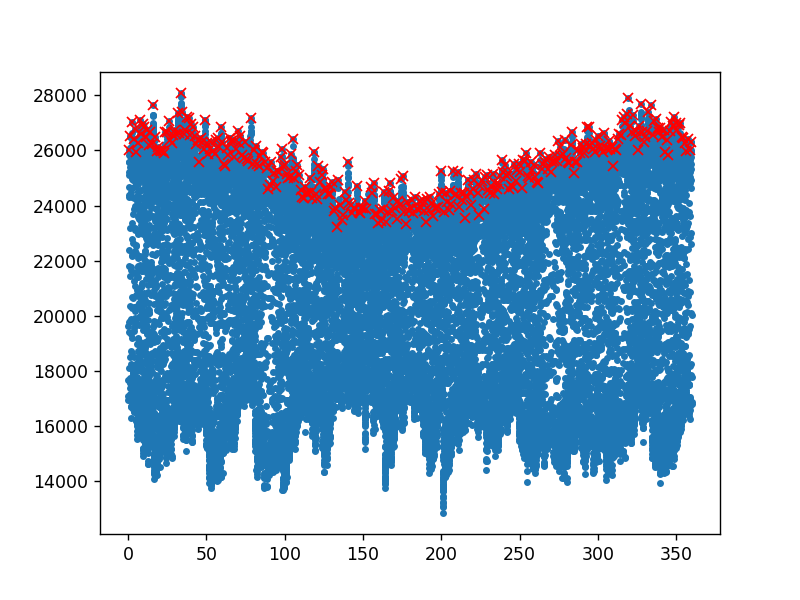

In [26]:
plt.figure(2)
plt.plot(x_axis, y_axis, '.')
plt.plot(list_of_x_of_local_max, list_of_y_max, 'xr')

# algo 3

In [2]:
import json
import numpy as np
import os

from lmfit import Model

import matplotlib.pyplot as plt
%matplotlib notebook

input_file = "data/debug_fit.json"
assert os.path.exists(input_file)

with open(input_file, 'r') as read_file:
    data = json.load(read_file)

x_axis_full = np.array(data['x_axis'])
y_axis_full = np.array(data['y_axis'])
assert len(x_axis_full) == len(y_axis_full)

last_index = -1
x_axis = x_axis_full[0: last_index]
y_axis = y_axis_full[0: last_index]

In [13]:
threshold = 22000

working_x_axis = []
working_y_axis = []
for _x, _y in zip(x_axis, y_axis):
    if np.isnan(_y):
        continue
    working_x_axis.append(_x)
    working_y_axis.append(_y)
       
we_are_in_high_region = False
we_are_in_low_region = False
we_are_in_threshold_region = False

we_were_in_high_region = False
we_were_in_low_regin = False
we_were_in_threshold_region = False

list_of_x_of_local_max = []
list_of_y_max = []
local_y_max = 0
x_of_local_max = 0
minimum_number_of_points_to_high_region = 5
number_of_points_in_current_high_region = 0
for _x_value, _y_value in zip(working_x_axis, working_y_axis):
    
#     if _x_value > 2.5:
#         pdb.set_trace()

    if _y_value < threshold:
        # in low region, nothing to record
        we_are_in_low_region = True

        if local_y_max != 0:
            if number_of_points_in_current_high_region >= minimum_number_of_points_to_high_region:
                list_of_x_of_local_max.append(x_of_local_max)
                list_of_y_max.append(local_y_max)
                local_y_max = 0
        
        number_of_points_in_current_high_region = 0
        continue

    else:
        
        if _y_value > local_y_max:
            x_of_local_max = _x_value
            local_y_max = _y_value
                
        we_were_in_high_region = True
        number_of_points_in_current_high_region += 1
        

In [14]:
plt.figure(2)
plt.plot(x_axis, y_axis, '.')
plt.plot(list_of_x_of_local_max, list_of_y_max, 'xr')

<IPython.core.display.Javascript object>